In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-storm-5-0/train_kaggle.csv
/kaggle/input/data-storm-5-0/test_kaggle.csv


# Train data prsprocessing
## Reading the CSV file

In [2]:
df = pd.read_csv("/kaggle/input/data-storm-5-0/train_kaggle.csv")
df.head()

/tmp/ipykernel_33/3559461997.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/data-storm-5-0/train_kaggle.csv")


,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832.0,Kelaniya,1209.6,756.0,5292.0,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4


## Updating the values recorded as strings to integer values

In [3]:
numeric_column = pd.to_numeric(df['luxury_sales'], errors='coerce')

# Find the indices where NaN values occur (indicating non-numeric values)
non_numeric_indices = numeric_column[numeric_column.isna()].index

df.loc[non_numeric_indices, 'luxury_sales']

4234                                      NaN
4333                                      NaN
5375                                      NaN
5408                                      NaN
78367                                     NaN
78380                                     NaN
80043       One thousand four hundread ruppes
174628                                    NaN
175278                                    nul
296621                                    nul
297911                 Eight hundread ruppess
326593                six hundread and hirty 
327258                                    NaN
327259                                    NaN
327260                                    NaN
327261                                    NaN
329847                                    NaN
329848                                    NaN
329849                                    NaN
352298                                    NaN
352662                                    NaN
352663                            

In [4]:
df.loc[80043, 'luxury_sales'] = 1400
df.loc[297911, 'luxury_sales'] = 800
df.loc[326593, 'luxury_sales'] = 630
df.loc[497177, 'luxury_sales'] = 1200
df.loc[497245, 'luxury_sales'] = 709
df.loc[558562, 'luxury_sales'] = 3200
df.loc[753131, 'luxury_sales'] = 4100

In [5]:
numeric_column = pd.to_numeric(df['fresh_sales'], errors='coerce')

# Find the indices where NaN values occur (indicating non-numeric values)
non_numeric_indices = numeric_column[numeric_column.isna()].index

df.loc[non_numeric_indices, 'fresh_sales']

4326                                      NaN
4327                                      NaN
4333                                      NaN
4929                                      NaN
5379                                      NaN
5403                                      NaN
5408                                      NaN
78367                                     NaN
78380                                     NaN
78400                                     NaN
161810           Six hundread and five ruppes
174714                                    nul
268571                                    nul
326334       Three thousana and five hundread
326763                                    NaN
326764                                    NaN
326765                                    NaN
327495                                    nul
327505                                    nul
329931                                    NaN
352298                                    NaN
352658                            

In [6]:
df.loc[161810, 'fresh_sales'] = 605
df.loc[326334, 'fresh_sales'] = 3500
df.loc[558897, 'fresh_sales'] = 13000
df.loc[752816, 'fresh_sales'] = 5000
df.loc[753256, 'fresh_sales'] = 2700

In [7]:
numeric_column = pd.to_numeric(df['dry_sales'], errors='coerce')

# Find the indices where NaN values occur (indicating non-numeric values)
non_numeric_indices = numeric_column[numeric_column.isna()].index

df.loc[non_numeric_indices, 'dry_sales']

4929                                        NaN
78400                                       NaN
148029    Four thousand and two hundread ruppes
174631                                      nul
174720                                      nul
175278                                      nul
268571                                      nul
296621                                      nul
327168                                      NaN
327169                                      NaN
327170                                      NaN
327171                                      NaN
327172                                      NaN
327173                                      NaN
327174                                      NaN
327495                                      nul
327505                                      nul
329931                                      NaN
345090                                      NaN
345091                                      NaN
345092                                  

In [8]:
df.loc[148029, 'dry_sales'] = 4200

In [9]:
numeric_column = pd.to_numeric(df['cluster_catgeory'], errors='coerce')

# Find the indices where NaN values occur (indicating non-numeric values)
non_numeric_indices = numeric_column[numeric_column.isna()].index

df.loc[non_numeric_indices, 'cluster_catgeory']

3560       6\
555560    NaN
Name: cluster_catgeory, dtype: object

In [10]:
df.loc[3560, 'cluster_catgeory'] = 6

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774155 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774153 non-null  float64
 1   outlet_city       774153 non-null  object 
 2   luxury_sales      774120 non-null  object 
 3   fresh_sales       774114 non-null  object 
 4   dry_sales         774125 non-null  object 
 5   cluster_catgeory  774154 non-null  object 
dtypes: float64(1), object(5)
memory usage: 35.4+ MB


## Setting the format of values in each column

In [12]:
df['luxury_sales'] = pd.to_numeric(df['luxury_sales'], errors='coerce')
df['fresh_sales'] = pd.to_numeric(df['fresh_sales'], errors='coerce')
df['dry_sales'] = pd.to_numeric(df['dry_sales'], errors='coerce')
df['cluster_catgeory'] = pd.to_numeric(df['cluster_catgeory'], errors='coerce')

In [13]:
print(df.head())
print(df.tail())

   Customer_ID outlet_city  luxury_sales  fresh_sales  dry_sales  \
0   10493832.0    Kelaniya       1209.60       756.00    5292.00   
1   10178643.0    Moratuwa       1590.12      1060.08    6007.12   
2   10513916.0     Wattala       2288.88      1481.04    9155.52   
3   10334589.0     Wattala       2274.94      1739.66    9099.76   
4   10458365.0    Kelaniya       2345.49      2069.55    9243.99   

   cluster_catgeory  
0               4.0  
1               1.0  
2               4.0  
3               4.0  
4               4.0  
        Customer_ID outlet_city  luxury_sales  fresh_sales  dry_sales  \
774150   10197979.0     Gampaha       3893.40      3893.40    3448.44   
774151   10494575.0  Katunayake       6095.86      5557.99    6275.15   
774152   10565682.0     Colombo       5121.42      4820.16    4669.53   
774153   10351977.0       Kandy       6311.76      6311.76    5940.48   
774154   10637635.0     Negombo       5833.50      6027.95    6611.30   

        cluster_catg

In [14]:
print(df.isnull().sum())

Customer_ID          2
outlet_city          2
luxury_sales        38
fresh_sales         45
dry_sales           37
cluster_catgeory     1
dtype: int64


### dropping the null value in 'cluster category

In [15]:
df = df.dropna(subset=['cluster_catgeory'])
df['cluster_catgeory'] = df['cluster_catgeory'].astype(int)

## Replacing the empty values of the 'Outlet_city' column with the mode value of that column

In [16]:
mode_value = df['outlet_city'].mode()[0]
df['outlet_city'] = df['outlet_city'].fillna(mode_value)

In [17]:
df.isnull().sum()

Customer_ID          2
outlet_city          0
luxury_sales        38
fresh_sales         45
dry_sales           37
cluster_catgeory     0
dtype: int64

## Finding duplicates

In [18]:
duplicates = df.duplicated(['outlet_city', 'luxury_sales', 'fresh_sales',
       'dry_sales', 'cluster_catgeory'])
duplicates.sum()

2940

In [19]:
import pandas as pd

# Identify all duplicated rows, including the first occurrence
all_duplicated_mask = df.duplicated(['outlet_city', 'luxury_sales', 'fresh_sales',
                                     'dry_sales', 'cluster_catgeory'], keep=False)

# Create a DataFrame with duplicated rows
duplicated_rows = df[all_duplicated_mask].reset_index()

# Create a DataFrame with first occurrences
first_occurrences = df.drop_duplicates(['outlet_city', 'luxury_sales', 'fresh_sales',
                                        'dry_sales', 'cluster_catgeory'], keep='first').reset_index()

# Merge the duplicated rows with the first occurrences based on the specified columns
merged = duplicated_rows.merge(first_occurrences, on=['outlet_city', 'luxury_sales', 'fresh_sales',
                                                      'dry_sales', 'cluster_catgeory'],
                               suffixes=('_duplicate', '_original'))

# Select and rename the relevant columns to create a clean mapping DataFrame
mapping_df = merged[['index_duplicate', 'index_original'] + 
                    [col for col in merged.columns if col.endswith('_duplicate')]]

# Display the mapping DataFrame
print(mapping_df)


      index_duplicate  index_original  index_duplicate  Customer_ID_duplicate
0                  60              60               60             10586838.0
1                 358             358              358             10503312.0
2                 401             401              401             10281329.0
3                 647             647              647             10206702.0
4                 736             736              736             10002336.0
...               ...             ...              ...                    ...
5862           773104          752690           773104             10085466.0
5863           773448          732524           773448             10179289.0
5864           773726          738072           773726             10688363.0
5865           773924          730962           773924             10593716.0
5866           774077          742402           774077             10089586.0

[5867 rows x 4 columns]


In [20]:
df_sorted = mapping_df.sort_values(by='index_original')
df_sorted.head(30)

,index_duplicate,index_original,index_duplicate,Customer_ID_duplicate
0,60,60,60,10586838.0
1764,161398,60,161398,10260295.0
1,358,358,358,10503312.0
391,35497,358,35497,10593395.0
2,401,401,401,10281329.0
1838,168710,401,168710,10241031.0
3,647,647,647,10206702.0
337,31082,647,31082,10412141.0
4,736,736,736,10002336.0
1457,133367,736,133367,10267068.0


In [21]:
print(df.loc[60,])
print(df.loc[161398,])

Customer_ID         10586838.0
outlet_city            Wattala
luxury_sales           2096.28
fresh_sales            1281.06
dry_sales              7686.36
cluster_catgeory             4
Name: 60, dtype: object
Customer_ID         10260295.0
outlet_city            Wattala
luxury_sales           2096.28
fresh_sales            1281.06
dry_sales              7686.36
cluster_catgeory             4
Name: 161398, dtype: object


- #### Didn't drop the duplicates because those values may not be a mistake  

In [22]:
print(df.isnull().sum())

Customer_ID          2
outlet_city          0
luxury_sales        38
fresh_sales         45
dry_sales           37
cluster_catgeory     0
dtype: int64


## Adding next unique values to the missing "Customer ID" values

In [23]:
# Find the maximum existing Customer_ID
max_id = df['Customer_ID'].max()

# Identify the indices where Customer_ID is missing
missing_indices = df[df['Customer_ID'].isnull()].index

# Generate new unique IDs starting from max_id + 1
new_ids = range(int(max_id) + 1, int(max_id) + 1 + len(missing_indices))

# Assign the new IDs to the missing Customer_ID entries
df.loc[missing_indices, 'Customer_ID'] = new_ids

In [24]:
print(df.isnull().sum())

Customer_ID          0
outlet_city          0
luxury_sales        38
fresh_sales         45
dry_sales           37
cluster_catgeory     0
dtype: int64


## Replacing all the null , nul and Nan values with mean value

In [25]:
numeric_cols = df.select_dtypes(include=[float, int]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [26]:
print(df.isnull().sum())

Customer_ID         0
outlet_city         0
luxury_sales        0
fresh_sales         0
dry_sales           0
cluster_catgeory    0
dtype: int64


In [27]:
df['Customer_ID'] = df['Customer_ID'].astype(int)
df['outlet_city'] = df['outlet_city'].str.lower()

## Finding the outliers of the cluter catergory

In [28]:
df['cluster_catgeory'].unique()

array([  4,   1,  99,   2,   5,   3,   6,  95,  98, 100,  89])

- #### Removing the outliers of the cluster category using Z-score method

In [29]:
from scipy import stats

# Calculate z-scores for 'cluster_category'
z_scores = stats.zscore(df['cluster_catgeory'])

# Define threshold for outlier detection
threshold = 3

# Identify rows with outlier values
outlier_indices = df[abs(z_scores) > threshold].index

# Remove rows with outliers
df = df.drop(outlier_indices)

df['cluster_catgeory'].unique()

array([4, 1, 2, 5, 3, 6])

## Setting One-Hot encoding method to the 'Outlet_city' column

In [30]:
df = pd.get_dummies(df, columns=['outlet_city'], dummy_na=False)

In [31]:
df.columns

Index(['Customer_ID', 'luxury_sales', 'fresh_sales', 'dry_sales',
       'cluster_catgeory', 'outlet_city_batticaloa', 'outlet_city_colombo',
       'outlet_city_dehiwala-mount lavinia', 'outlet_city_galle',
       'outlet_city_gampaha', 'outlet_city_homagama', 'outlet_city_jaffna',
       'outlet_city_kaduwela', 'outlet_city_kalmunai', 'outlet_city_kandy',
       'outlet_city_katunayake', 'outlet_city_kelaniya', 'outlet_city_kotte',
       'outlet_city_moratuwa', 'outlet_city_negombo',
       'outlet_city_nuwara eliya', 'outlet_city_panadura',
       'outlet_city_peliyagoda', 'outlet_city_trincomalee',
       'outlet_city_wattala'],
      dtype='object')

## Creating a new feature
- #### The new feature is called 'total_score' which is the sum of 'luxury_sales' , 'fresh_sales' and 'dry_sales' columns

In [32]:
# Create a new column 'Total Sales' by summing up luxury, dry, and fresh sales
df['Total_Sales'] = df['luxury_sales'] + df['fresh_sales'] + df['dry_sales']

df.insert(5, 'Total_Sales', df.pop('Total_Sales'))

df.head()

,Customer_ID,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,Total_Sales,outlet_city_batticaloa,outlet_city_colombo,outlet_city_dehiwala-mount lavinia,outlet_city_galle,...,outlet_city_katunayake,outlet_city_kelaniya,outlet_city_kotte,outlet_city_moratuwa,outlet_city_negombo,outlet_city_nuwara eliya,outlet_city_panadura,outlet_city_peliyagoda,outlet_city_trincomalee,outlet_city_wattala
0,10493832,1209.60,756.00,5292.00,4,7257.60,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,10178643,1590.12,1060.08,6007.12,1,8657.32,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,10513916,2288.88,1481.04,9155.52,4,12925.44,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,10334589,2274.94,1739.66,9099.76,4,13114.36,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,10458365,2345.49,2069.55,9243.99,4,13659.03,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


## Using standard scaler

In [33]:
from sklearn.preprocessing import StandardScaler

# Extract the columns to be scaled
columns_to_scale = ['luxury_sales', 'fresh_sales', 'dry_sales', 'Total_Sales']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [34]:
df.head()

,Customer_ID,luxury_sales,fresh_sales,dry_sales,cluster_catgeory,Total_Sales,outlet_city_batticaloa,outlet_city_colombo,outlet_city_dehiwala-mount lavinia,outlet_city_galle,...,outlet_city_katunayake,outlet_city_kelaniya,outlet_city_kotte,outlet_city_moratuwa,outlet_city_negombo,outlet_city_nuwara eliya,outlet_city_panadura,outlet_city_peliyagoda,outlet_city_trincomalee,outlet_city_wattala
0,10493832,-0.709489,-1.101399,0.180599,4,-0.982408,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,10178643,-0.330507,-1.010208,0.390355,1,-0.617597,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,10513916,0.365429,-0.883967,1.313829,4,0.494808,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,10334589,0.351545,-0.806410,1.297473,4,0.544047,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,10458365,0.421810,-0.707480,1.339778,4,0.686005,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


## Test-Train data split

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split features and target variable
X = df[['luxury_sales', 'fresh_sales', 'dry_sales', 'Total_Sales', 'outlet_city_batticaloa',
       'outlet_city_colombo', 'outlet_city_dehiwala-mount lavinia',
       'outlet_city_galle', 'outlet_city_gampaha', 'outlet_city_homagama',
       'outlet_city_jaffna', 'outlet_city_kaduwela', 'outlet_city_kalmunai',
       'outlet_city_kandy', 'outlet_city_katunayake', 'outlet_city_kelaniya',
       'outlet_city_kotte', 'outlet_city_moratuwa', 'outlet_city_negombo',
       'outlet_city_nuwara eliya', 'outlet_city_panadura',
       'outlet_city_peliyagoda', 'outlet_city_trincomalee',
       'outlet_city_wattala']]
y = df['cluster_catgeory']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

* ## random forest model

In [36]:
from sklearn.metrics import accuracy_score, classification_report

# Instantiate the RandomForestClassifier model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the validation data
y_pred1 = rf_classifier.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred1)
print("Accuracy:", accuracy)
print(classification_report(y_val, y_pred1))

Accuracy: 0.9997674869211393
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     37863
           2       1.00      1.00      1.00     30989
           3       1.00      1.00      1.00      9645
           4       1.00      1.00      1.00     34418
           5       1.00      1.00      1.00      7934
           6       1.00      1.00      1.00     33981

    accuracy                           1.00    154830
   macro avg       1.00      1.00      1.00    154830
weighted avg       1.00      1.00      1.00    154830



* ## Gradient Boosting

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train,y_train)

y_pred3 = gb_classifier.predict(X_val)

accuracy = accuracy_score(y_val, y_pred3)
print("Accuracy:", accuracy)
print(classification_report(y_val, y_pred3))

Accuracy: 0.999683523864884
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     37863
           2       1.00      1.00      1.00     30989
           3       1.00      1.00      1.00      9645
           4       1.00      1.00      1.00     34418
           5       1.00      1.00      1.00      7934
           6       1.00      1.00      1.00     33981

    accuracy                           1.00    154830
   macro avg       1.00      1.00      1.00    154830
weighted avg       1.00      1.00      1.00    154830



- ### cluster interpretation 

In [38]:
# Assuming your model is already trained
cluster_labels = rf_classifier.predict(X_train)
df_train = X_train.copy()
df_train['cluster_label'] = cluster_labels

In [39]:
df_train.head(20)

,luxury_sales,fresh_sales,dry_sales,Total_Sales,outlet_city_batticaloa,outlet_city_colombo,outlet_city_dehiwala-mount lavinia,outlet_city_galle,outlet_city_gampaha,outlet_city_homagama,...,outlet_city_kelaniya,outlet_city_kotte,outlet_city_moratuwa,outlet_city_negombo,outlet_city_nuwara eliya,outlet_city_panadura,outlet_city_peliyagoda,outlet_city_trincomalee,outlet_city_wattala,cluster_label
678170,-0.406240,0.573244,-1.066305,-0.555593,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,6
82914,0.852373,-0.801990,1.544398,0.898359,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,4
537988,-0.717138,-0.847525,0.596731,-0.394007,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
680576,0.321149,1.252012,-0.896170,0.375846,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,6
570452,0.994317,2.448650,-0.729195,1.740365,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,6
190371,-1.027041,0.163356,-0.936170,-0.958646,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,2
659572,0.890976,1.605950,-0.936815,0.796453,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,6
723401,0.264499,1.077288,-0.943866,0.166788,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,6
230944,-1.116637,-0.090413,-1.064466,-1.316641,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,2
195129,-0.491414,0.660928,-0.773028,-0.241079,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,2


In [40]:
# Group data by clusters and calculate summary statistics
cluster_summary = df_train.groupby('cluster_label').agg({
    'luxury_sales': ['mean', 'median'],
    'fresh_sales': ['mean', 'median'],
    'dry_sales': ['mean', 'median'],
    'Total_Sales': ['mean', 'median'],
    # Add other features as necessary
}).reset_index()
cluster_summary

cluster_label luxury_sales           fresh_sales           dry_sales  \
                        mean    median        mean    median      mean   
0             1    -0.357737 -0.381540   -0.671920 -0.676324  1.102645   
1             2    -0.670368 -0.689700    0.693700  0.690785 -0.858588   
2             3     2.137418  2.125099   -0.107844 -0.110266 -0.178555   
3             4    -0.172021 -0.185018   -0.953061 -0.959239  0.606605   
4             5     1.317801  1.308936   -0.354181 -0.357838 -0.419662   
5             6     0.261745  0.243434    1.198917  1.195109 -0.913285   

            Total_Sales            
     median        mean    median  
0  1.102765    0.302201  0.302874  
1 -0.862700   -0.335454 -0.338544  
2 -0.178005    0.306954  0.306902  
3  0.604768   -0.334304 -0.337580  
4 -0.421674   -0.335861 -0.340408  
5 -0.920873    0.298947  0.293033

In [41]:
cluster_summary.dtypes

cluster_label              int64
luxury_sales   mean      float64
               median    float64
fresh_sales    mean      float64
               median    float64
dry_sales      mean      float64
               median    float64
Total_Sales    mean      float64
               median    float64
dtype: object

In [42]:
# Assuming 'cleaned_train_df' contains the cleaned dataset with 'cluster_category' column
# Group data by cluster category
cluster_groups = df.groupby('cluster_catgeory')

# Define cluster names (you can customize these)
cluster_names = {
    1: "Cluster 1",
    2: "Cluster 2",
    3: "Cluster 3",
    4: "Cluster 4",
    5: "Cluster 5",
    6: "Cluster 6"
}

# Iterate over each cluster group
for cluster_id, group_df in cluster_groups:
    print(f"Cluster: {cluster_names[cluster_id]}")
    print("Cluster Characteristics:")
    
# Calculate statistics for relevant features
features = group_df[['luxury_sales', 'fresh_sales', 'dry_sales', 'Total_Sales', 'outlet_city_batticaloa',
       'outlet_city_colombo', 'outlet_city_dehiwala-mount lavinia',
       'outlet_city_galle', 'outlet_city_gampaha', 'outlet_city_homagama',
       'outlet_city_jaffna', 'outlet_city_kaduwela', 'outlet_city_kalmunai',
       'outlet_city_kandy', 'outlet_city_katunayake', 'outlet_city_kelaniya',
       'outlet_city_kotte', 'outlet_city_moratuwa', 'outlet_city_negombo',
       'outlet_city_nuwara eliya', 'outlet_city_panadura',
       'outlet_city_peliyagoda', 'outlet_city_trincomalee',
       'outlet_city_wattala']].describe()
    
# Print statistics
print(features)
print("\n")

Cluster: Cluster 1
Cluster Characteristics:
Cluster: Cluster 2
Cluster Characteristics:
Cluster: Cluster 3
Cluster Characteristics:
Cluster: Cluster 4
Cluster Characteristics:
Cluster: Cluster 5
Cluster Characteristics:
Cluster: Cluster 6
Cluster Characteristics:
        luxury_sales    fresh_sales      dry_sales    Total_Sales
count  169215.000000  169215.000000  169215.000000  169215.000000
mean        0.262022       1.198604      -0.913378       0.298665
std         0.779165       0.877257       0.169700       1.102411
min        -1.167232      -1.068237      -1.224968      -1.686196
25%        -0.399373       0.441338      -1.055549      -0.651161
50%         0.243165       1.194707      -0.921058       0.292762
75%         0.892306       1.951392      -0.784600       1.243083
max         4.777725       2.869700       1.136575       2.585334




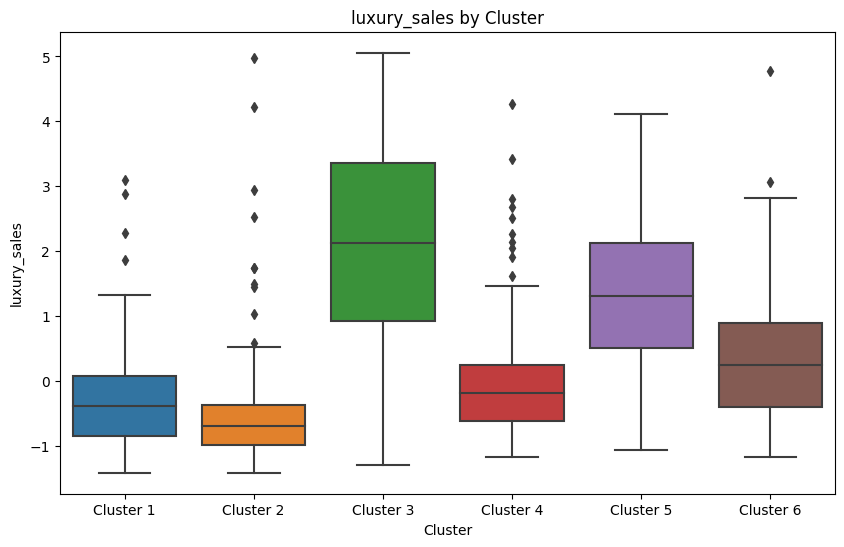

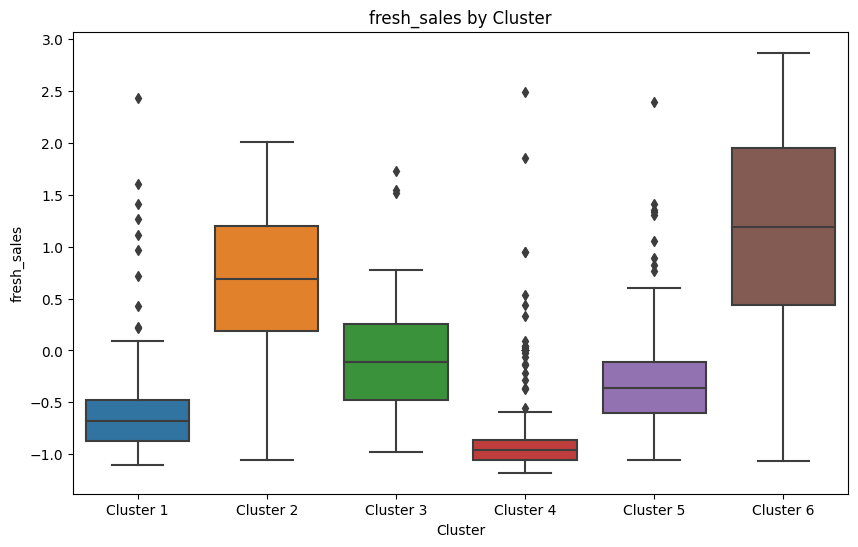

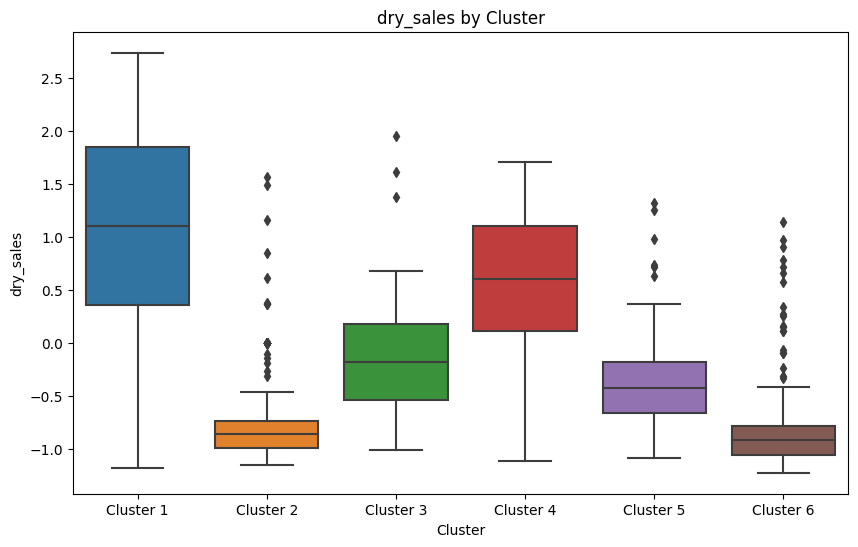

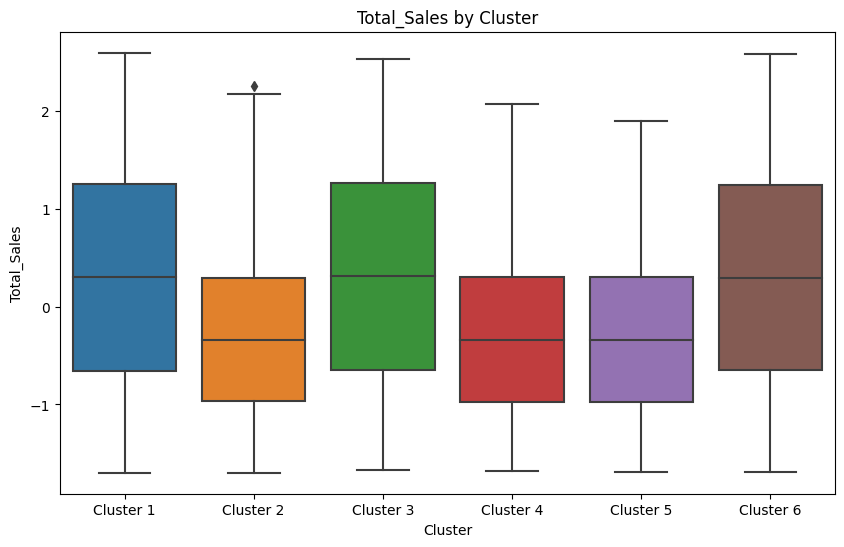

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

cluster_names = {1: "Cluster 1", 2: "Cluster 2", 3: "Cluster 3", 4: "Cluster 4", 5: "Cluster 5", 6: "Cluster 6"}

# Create a box plot for each feature
for feature in features[['luxury_sales', 'fresh_sales', 'dry_sales', 'Total_Sales']]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster_catgeory', y=feature, data=df)
    plt.title(f"{feature} by Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(feature)
    plt.xticks(ticks=range(len(cluster_names)), labels=[cluster_names[i] for i in range(1, len(cluster_names) + 1)])
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

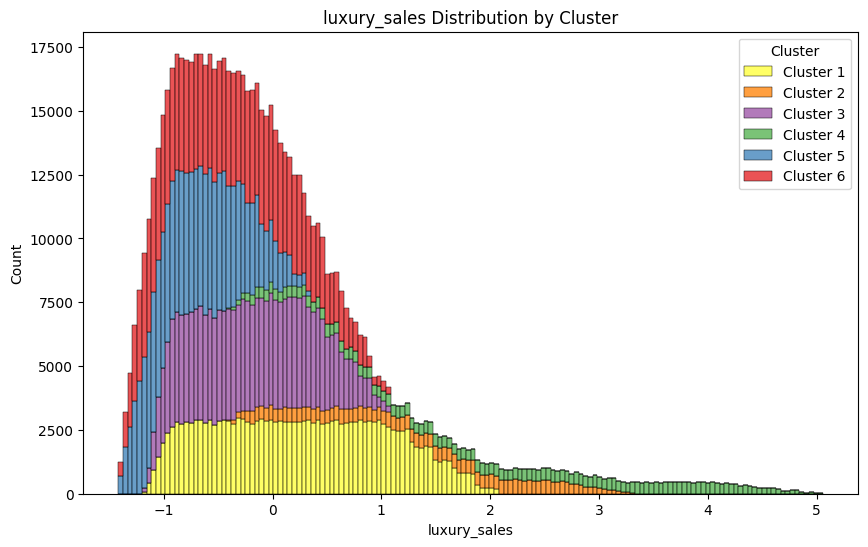

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

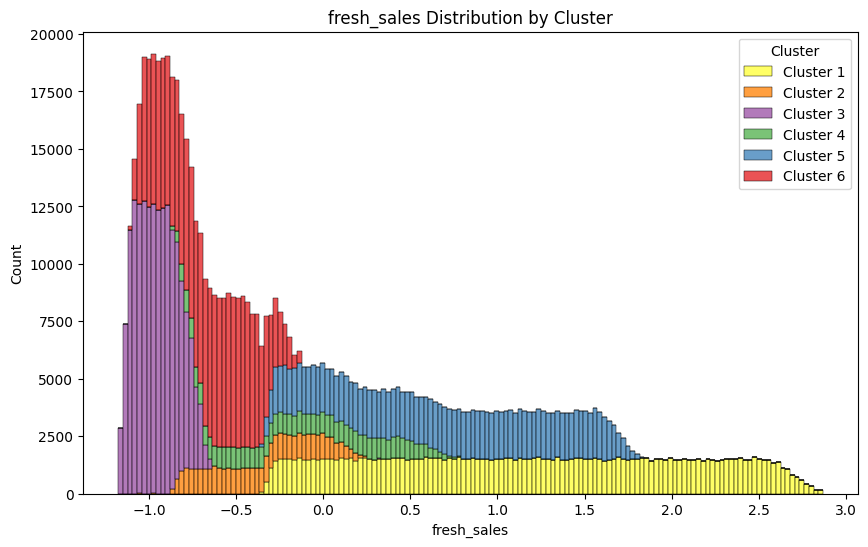

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

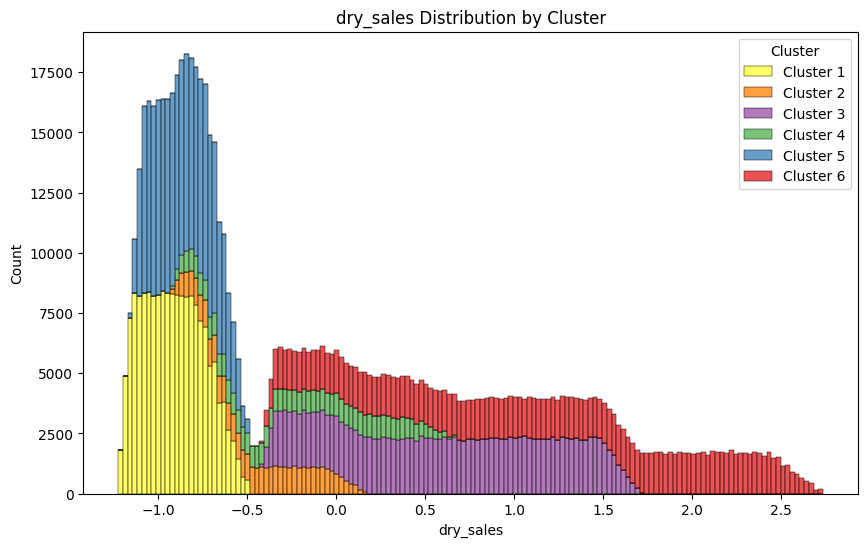

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

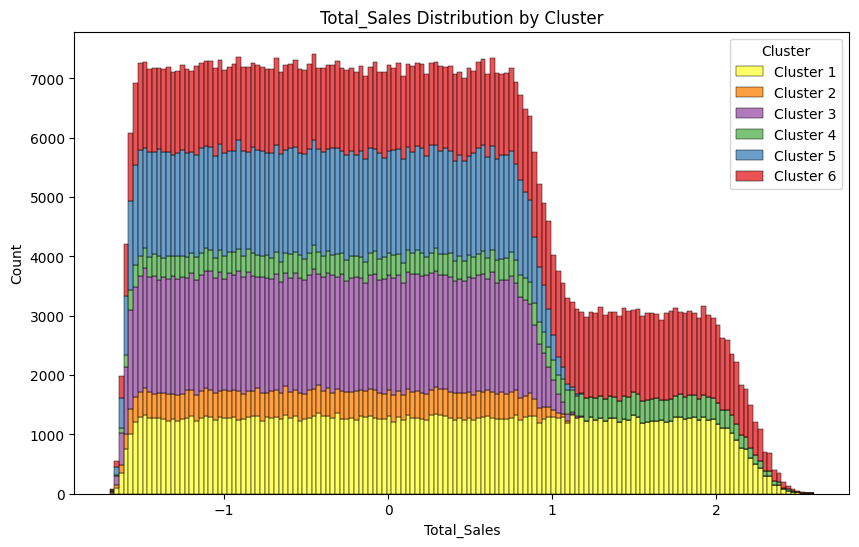

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

df.replace([float('inf'), float('-inf')], float('nan'), inplace=True)

# Create a histogram for each feature
for feature in features[['luxury_sales', 'fresh_sales', 'dry_sales', 'Total_Sales']]:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, hue='cluster_catgeory', multiple='stack', palette='Set1', bins=150)
    plt.title(f"{feature} Distribution by Cluster")
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Cluster', labels=[cluster_names[i] for i in range(1, len(cluster_names) + 1)])
    plt.show()


# Test data set preprocessing

In [45]:
df_test = pd.read_csv("/kaggle/input/data-storm-5-0/test_kaggle.csv")
df_test.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales
0,33574,batticaloa,2686.5,3582,12537
1,10089,batticaloa,1717.56,2576.34,9446.58
2,38329,batticaloa,854.04,1242.24,5201.88
3,11376,batticaloa,1638.12,2320.67,9282.68
4,12410,batticaloa,1039.09,1518.67,5435.24


In [46]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40749 entries, 0 to 40748
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Customer_ID   40749 non-null  int64 
 1   outlet_city   40749 non-null  object
 2   luxury_sales  40749 non-null  object
 3   fresh_sales   40749 non-null  object
 4   dry_sales     40749 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.6+ MB


In [47]:
df_test.describe()

,Customer_ID
count,40749.000000
mean,20375.000000
std,11763.367396
min,1.000000
25%,10188.000000
50%,20375.000000
75%,30562.000000
max,40749.000000


### Updating the values that are recorded as string into integers

In [48]:
numeric_column = pd.to_numeric(df_test['luxury_sales'], errors='coerce')

# Find the indices where NaN values occur (indicating non-numeric values)
non_numeric_indices = numeric_column[numeric_column.isna()].index

df_test.loc[non_numeric_indices, 'luxury_sales']

6        Seven Hundread and sixty Ruppees
6299    Eight Hundread and fifteen ruppes
Name: luxury_sales, dtype: object

In [49]:
df_test.loc[6, 'luxury_sales'] = 760
df_test.loc[6299, 'luxury_sales'] = 815 

In [50]:
numeric_column = pd.to_numeric(df_test['fresh_sales'], errors='coerce')

# Find the indices where NaN values occur (indicating non-numeric values)
non_numeric_indices = numeric_column[numeric_column.isna()].index

df_test.loc[non_numeric_indices, 'fresh_sales']

13949    Nine thousand ruppess
Name: fresh_sales, dtype: object

In [51]:
df_test.loc[13949, 'fresh_sales'] = 9000

In [52]:
numeric_column = pd.to_numeric(df_test['dry_sales'], errors='coerce')

# Find the indices where NaN values occur (indicating non-numeric values)
non_numeric_indices = numeric_column[numeric_column.isna()].index

df_test.loc[non_numeric_indices, 'dry_sales']

40746    Three Thousand seven hundread ruppees
Name: dry_sales, dtype: object

In [53]:
df_test.loc[40746, 'dry_sales'] = 3700

### Setting the formats of the sales columns

In [54]:
df_test['luxury_sales'] = pd.to_numeric(df_test['luxury_sales'], errors='coerce')
df_test['fresh_sales'] = pd.to_numeric(df_test['fresh_sales'], errors='coerce')
df_test['dry_sales'] = pd.to_numeric(df_test['dry_sales'], errors='coerce')

In [55]:
print(df_test.isnull().sum())

Customer_ID     0
outlet_city     0
luxury_sales    0
fresh_sales     0
dry_sales       0
dtype: int64


In [56]:
df_test.dtypes

Customer_ID       int64
outlet_city      object
luxury_sales    float64
fresh_sales     float64
dry_sales       float64
dtype: object

### checking for duplicates

In [58]:
duplicates = df_test.duplicated(['outlet_city', 'luxury_sales', 'fresh_sales',
       'dry_sales'])
duplicates.sum()

6

In [59]:
print(df_test.isnull().sum())

Customer_ID     0
outlet_city     0
luxury_sales    0
fresh_sales     0
dry_sales       0
dtype: int64


In [60]:
mode_value = df_test['outlet_city'].mode()[0]
df_test['outlet_city'] = df_test['outlet_city'].fillna(mode_value)

In [61]:
df_test['Customer_ID'] = df_test['Customer_ID'].astype(int)
df_test['outlet_city'] = df_test['outlet_city'].str.lower()

In [62]:
df_test.dtypes

Customer_ID       int64
outlet_city      object
luxury_sales    float64
fresh_sales     float64
dry_sales       float64
dtype: object

In [63]:
df_test['outlet_city'].unique()

array(['batticaloa', 'colombo', 'dehiwala-mount lavinia', 'anuradhapura',
       'galle', 'gampaha', 'homagama', 'jaffna', 'kaduwela', 'kalmunai',
       'kandy', 'katunayake', 'kelaniya', 'madawachiya', 'kotte',
       'moratuwa', 'negombo', 'nuwara eliya', 'panadura', 'peliyagoda',
       'trincomale', 'trincomalee', 'wattala'], dtype=object)

### Applying One-Hot encoding to the 'outlet_city' column

In [64]:
df_test = pd.get_dummies(df_test, columns=['outlet_city'], dummy_na=False)

In [65]:
df_test.head()

,Customer_ID,luxury_sales,fresh_sales,dry_sales,outlet_city_anuradhapura,outlet_city_batticaloa,outlet_city_colombo,outlet_city_dehiwala-mount lavinia,outlet_city_galle,outlet_city_gampaha,...,outlet_city_kotte,outlet_city_madawachiya,outlet_city_moratuwa,outlet_city_negombo,outlet_city_nuwara eliya,outlet_city_panadura,outlet_city_peliyagoda,outlet_city_trincomale,outlet_city_trincomalee,outlet_city_wattala
0,33574,2686.50,3582.00,12537.00,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10089,1717.56,2576.34,9446.58,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,38329,854.04,1242.24,5201.88,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,11376,1638.12,2320.67,9282.68,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,12410,1039.09,1518.67,5435.24,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [66]:
df_test.describe()

,Customer_ID,luxury_sales,fresh_sales,dry_sales
count,40749.000000,40749.000000,40749.000000,40749.000000
mean,20375.000000,1927.068008,4442.969841,4691.508888
std,11763.367396,1003.797058,3349.438752,3410.980901
min,1.000000,500.800000,500.300000,500.900000
25%,10188.000000,1220.400000,1619.550000,1799.520000
50%,20375.000000,1721.720000,3369.060000,3755.340000
75%,30562.000000,2346.120000,6697.140000,7183.440000
max,40749.000000,6985.650000,13995.100000,13989.500000


## Creating a new feature
- ### Creating a column called "Total_sales" which is the sum of "luxury sales", "fresh_sales" and "dry_sales".

In [67]:
# Create a new column 'Total Sales' by summing up luxury, dry, and fresh sales
df_test['Total_Sales'] = df_test['luxury_sales'] + df_test['fresh_sales'] + df_test['dry_sales']

df_test.insert(5, 'Total_Sales', df_test.pop('Total_Sales'))

## Applying standard scaler

In [68]:
# Extract the columns to be scaled
columns_to_scale = ['luxury_sales', 'fresh_sales', 'dry_sales','Total_Sales']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the columns
df_test[columns_to_scale] = scaler.fit_transform(df_test[columns_to_scale])

In [69]:
df_test.columns

Index(['Customer_ID', 'luxury_sales', 'fresh_sales', 'dry_sales',
       'outlet_city_anuradhapura', 'Total_Sales', 'outlet_city_batticaloa',
       'outlet_city_colombo', 'outlet_city_dehiwala-mount lavinia',
       'outlet_city_galle', 'outlet_city_gampaha', 'outlet_city_homagama',
       'outlet_city_jaffna', 'outlet_city_kaduwela', 'outlet_city_kalmunai',
       'outlet_city_kandy', 'outlet_city_katunayake', 'outlet_city_kelaniya',
       'outlet_city_kotte', 'outlet_city_madawachiya', 'outlet_city_moratuwa',
       'outlet_city_negombo', 'outlet_city_nuwara eliya',
       'outlet_city_panadura', 'outlet_city_peliyagoda',
       'outlet_city_trincomale', 'outlet_city_trincomalee',
       'outlet_city_wattala'],
      dtype='object')

## Predict the "cluster_category" values for the test data set

In [70]:
X_test = df_test[['luxury_sales', 'fresh_sales', 'dry_sales', 'Total_Sales', 'outlet_city_batticaloa',
       'outlet_city_colombo', 'outlet_city_dehiwala-mount lavinia',
       'outlet_city_galle', 'outlet_city_gampaha', 'outlet_city_homagama',
       'outlet_city_jaffna', 'outlet_city_kaduwela', 'outlet_city_kalmunai',
       'outlet_city_kandy', 'outlet_city_katunayake', 'outlet_city_kelaniya',
       'outlet_city_kotte', 'outlet_city_moratuwa', 'outlet_city_negombo',
       'outlet_city_nuwara eliya', 'outlet_city_panadura',
       'outlet_city_peliyagoda', 'outlet_city_trincomalee',
       'outlet_city_wattala']]
test_predictions = rf_classifier.predict(X_test)

In [71]:
submission_df = pd.DataFrame({'Customer_ID': df_test['Customer_ID'], 'Cluster_category':test_predictions})
submission_df

,Customer_ID,Cluster_category
0,33574,1
1,10089,1
2,38329,1
3,11376,1
4,12410,1
...,...,...
40744,33698,5
40745,4185,5
40746,28664,5
40747,11874,5
